# Introduction

The ["SARS-CoV-2 virus"](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2) (abbreviation for "Severe Acute Respiratory Syndrome CoronaVirus 2") spreads rapidly.

For the current spread of the virus see, e.g., the following map:

["Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)](https://coronavirus.jhu.edu/map.html).

It can cause a respiratory illness which is called ["COVID-19"](https://en.wikipedia.org/wiki/Coronavirus_disease_2019) (from "COronaVIrus Disease 2019").

In this context, machine learning engineers and researchs try to help.

Recently, [Kaggle](https://www.kaggle.com/) published the [CORD-19 dataset (COVID-19 Open Research Dataset)](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) - a dataset of over 45.000 medical articles related to corona-viruses:

>In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 45,000 scholarly articles, including over 33,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.

[Quotation source](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)

Notebook by [Prof. Dr. Jürgen Brauer](www.juergenbrauer.org)

# Goal of this notebook

This notebook tries to make use of the huge CORD-19 article dataset in order to find evidences for the currently discussed medications that may help against the virus.

To be more precise, this notebook is a try to give some answers to the CORD-19 challenge question:

["What do we know about vaccines and therapeutics?"](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/tasks?taskId=561)

To focus the search we concentrate on drugs against COVID-19.

# All notebook settings at one place

Here we set all parameters in one code cell. This gives you an good overview what you can adjust before running the notebook.

Each parameter that can be set starts with `PARAM_`.

In [4]:
# Where do you have stored the CORD-19 dataset on your computer?
PARAM_dataset_cord19 = "/home/juebrauer/link_to_vcd/12_datasets/01_cord-19-research-challenge_v5"

# What is the name of the CORD-19 metadata file?
PARAM_filename_metadata_cord19 = PARAM_dataset_cord19 + "/" + "metadata.csv"

# Methodology

Two steps:

- First we look at non CORD-19 articles: Which drugs (or more generally therapies) are mentioned here to fight the virus?
- On the basis of these articles, a list of promising drugs is compiled, for which evidence is then sought in the more than 45,000 CORD-19 articles.

# Identifying promising drugs (therapies)

We first compile a list of promising drugs against COVID-19. We use press articles and professional medial publications for compiling the list.

Why press articles to collect a list of possible drugs? Press articles are very topical and researchers from a wide range of research areas are often interviewed.


Here is a list of articles talking about COVID-19 related promising drugs:

- **Article title:** "Unlike FDA, European regulators refuse to clear chloroquine for COVID-19 without data"<br>
  **Article type:** Press article<br>
  **Article date:** 02.04.2020<br>
  **Link:** https://www.fiercepharma.com/pharma/europe-locks-down-chloroquine-scripts-as-researchers-china-report-positive-controlled-covid<br>
  **Drug candidates:** _Chloroquine, Hydroxychloroquine_
  
- **Article title:** "Coronavirus: New drug and vaccine show promise against COVID-19"<br>
  **Article type:** Press article<br>
  **Article date:** 03.04.2020<br>
  **Link:** https://www.newshub.co.nz/home/world/2020/04/coronavirus-new-drug-and-vaccine-show-promise-against-covid-19.html<br>
  **Drug candidates:** _APN01 (or APN001)_

- **Article title:** "Remdesivir most promising COVID-19 drug, say researchers"<br>
  **Article type:** Press article<br>
  **Article date:** 27.03.2020<br>
  **Link:** https://www.drugtargetreview.com/news/58608/remdesivir-most-promising-covid-19-drug-say-researchers/<br>
  **Drug candidates:** _remdesivir, tilarone_
  
- **Article title:** "COVID-19 Drug Therapy – Potential Options"<br>
  **Article type:** Medical publication<br>
  **Article date:** 26.03.2020<br>
  **Link:** https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjK5-flnszoAhWTilwKHaZPBDQQFjAAegQIBRAB&url=https%3A%2F%2Fwww.elsevier.com%2F__data%2Fassets%2Fpdf_file%2F0007%2F988648%2FCOVID-19-Drug-Therapy_Mar-2020.pdf&usg=AOvVaw25eIClQRNh7ipfOu0IvWEm<br>
  **Drug candidates:** _Chloroquine, Hydroxychloroquine, Lopinavir, Ritonavir, Remdesivir (GS-5734), Azithromycin, Tocilizumab_
  
- **Article title:** "COVID-19 drug repurposing research"<br>
  **Article type:** Wikipedia article<br>
  **Article date:** 03.04.2020<br>
  **Link:** https://en.wikipedia.org/wiki/COVID-19_drug_repurposing_research<br>
  **Drug candidates:** _Chloroquine, Favipiravir, Interferon beta (IFN-β), Lopinavir, Ritonavir, Remdesivir, Intravenous vitamin C, Azithromycin, Ciclesonide_
  
- **Article title:**<br>
  **Article type:**<br>
  **Article date:**<br>
  **Link:** 
  **Drug candidates:**
  
List of many other candidates: https://www.visualcapitalist.com/every-vaccine-treatment-covid-19-so-far/


# Some notes regarding the candidates

Some notes regarding the candidates:

- many candidates fall into the category of "drug repositioning" (drug repurposing), which is the repurposing of an approved drug for the treatment of another disease

- "chloroquine" and "hydroxychloroquine" are anti-malarial drugs<br>
  Source: https://www.cnbc.com/2020/03/30/who-says-early-data-shows-some-drugs-may-have-an-impact-on-coronavirus-but-more-research-is-needed.html
  
- Lopinavir, Ritonavir are HIV Protease Inhibitor<br>
  Source: "COVID-19 Drug Therapy – Potential Options", Elsevier 26.03.2020


# Some meta-data analysis of the CORD-19 dataset

## Read in meta-data

In [13]:
# Read in the metadata file

import pandas as pd
df = pd.read_csv(PARAM_filename_metadata_cord19)

In [8]:
df.shape

(45774, 17)

In [12]:
# Show first 5 rows of the metadata
# to get a feeling for the metadata

df.head(5)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


Some column names and meanings:

  * cord_uid: a unique identifier for each article in the CORD-19 dataset
  * sha: many of the paper records have PDFs and the hash of the PDFs are in 'sha'
  * source_x: where is the article published?
  * title: title of the article
  * doi: the [Digital Object Identifier (DOI)](https://en.wikipedia.org/wiki/Digital_object_identifier) of the article. Why DOIs? DOIs are fixed, while URLs (website addresses) can change
  * pcmid: id present if it is a "PubMed Central (PMC)" article. "PubMed Central" is a free full-text archive of biomedical and life sciences journal literature at the U.S. National Institutes of Health's National Library of Medicine (NIH/NLM)
  * ...

|   |   |   |   |   |
|---|---|---|---|---|
|   |   |   |   |   |

## Analyse publication years of articles

In [19]:
dates = pd.to_datetime(df["publish_time"])
dates

0       2014-01-10
1       2014-06-04
2       2014-07-03
3       2014-07-25
4       2014-11-11
           ...    
45769   2015-11-01
45770   2011-11-30
45771   2020-03-07
45772   2020-02-17
45773   2017-03-03
Name: publish_time, Length: 45774, dtype: datetime64[ns]

In [20]:
type(dates)

pandas.core.series.Series

In [36]:
publication_years = []
for date in dates:
    year = date.year
    if not isinstance(year,int):
        print("Article found with unknown publication year (year={0})".format(year))
    else:
        publication_years.append( year )

Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)
Article found with unknown publication year (year=nan)


In [58]:
publication_years[:20]

[2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016]

In [61]:
earliest_publication = min(publication_years)
earliest_publication

1951

In [63]:
latest_publication = max(publication_years)
latest_publication

2020

In [64]:
import numpy as np
list_of_years = list(np.arange(earliest_publication,latest_publication+1))

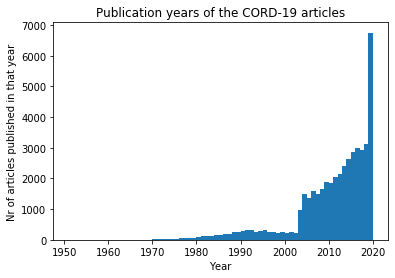

In [66]:
import matplotlib.pyplot as plt
hist_data = plt.hist( publication_years, bins=list_of_years )
plt.title("Publication years of the CORD-19 articles")
plt.xlabel("Year")
plt.ylabel("Nr of articles published in that year")
plt.show()